# Classify images(CiFAR-20) using CNN

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(8964)

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

2024-01-14 21:50:30.691650: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-14 21:50:30.713086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 21:50:30.713108: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 21:50:30.713846: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-14 21:50:30.717826: I tensorflow/core/platform/cpu_feature_guar

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

## Visualize data

[9]


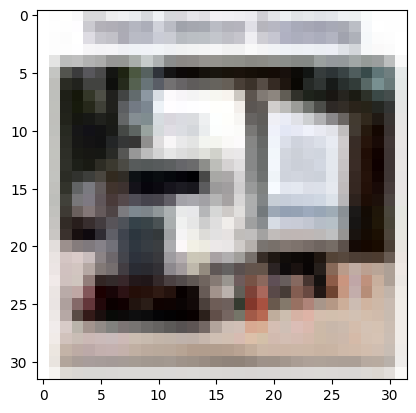

In [7]:
i = 666
plt.imshow(X_train[i])
print(y_train[i])

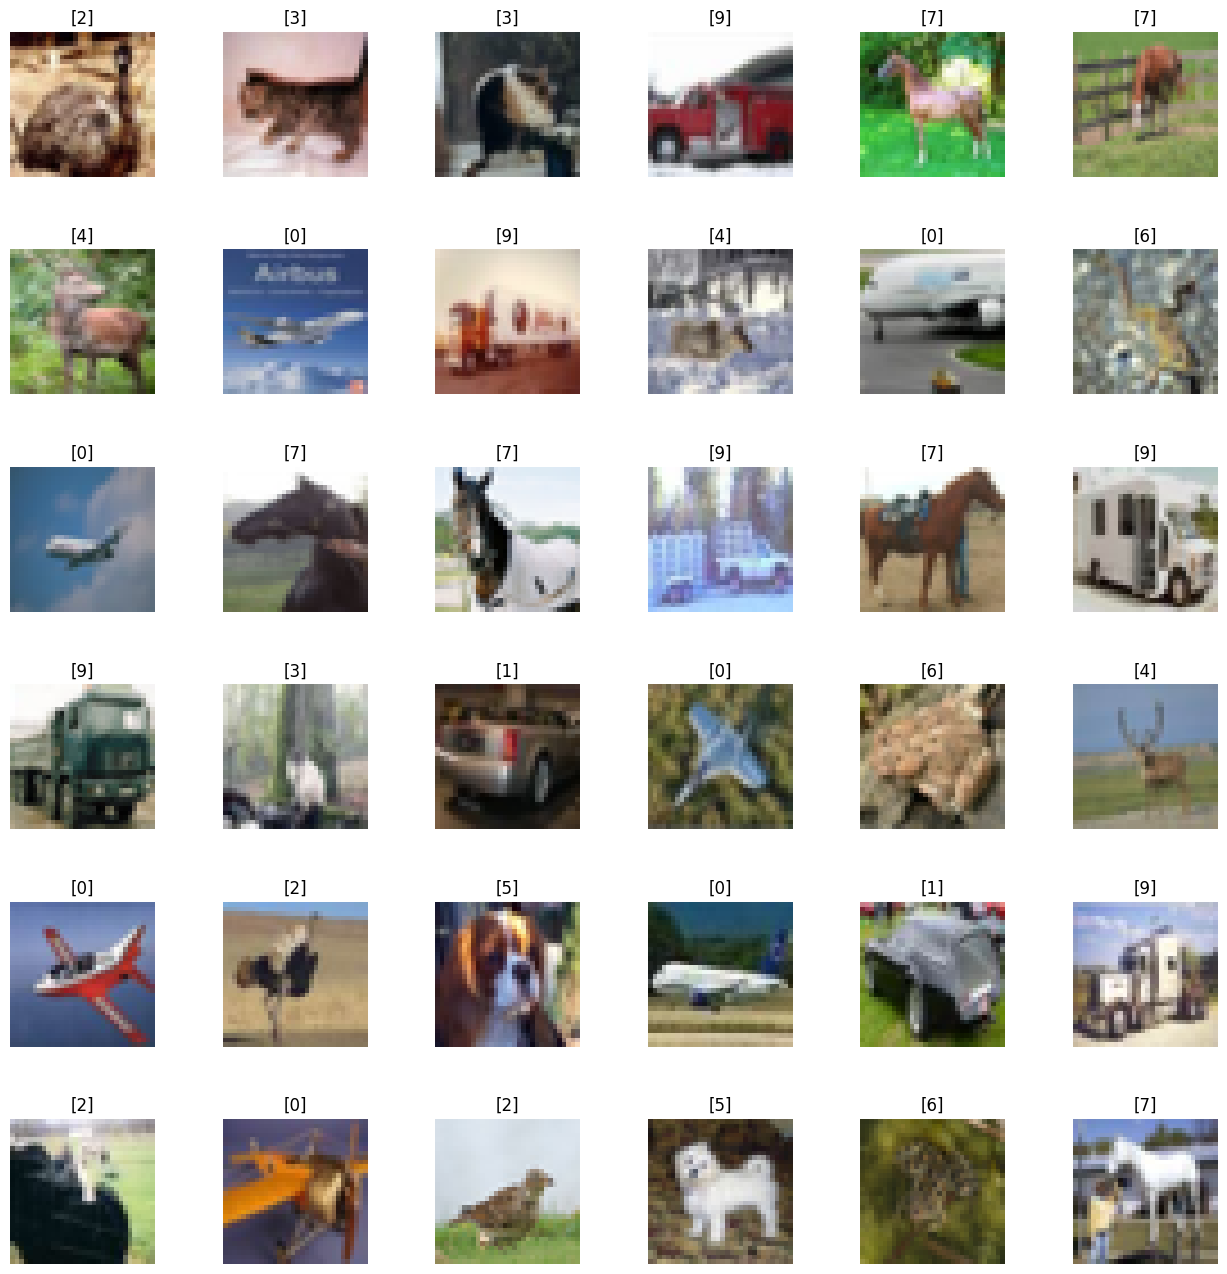

In [8]:
fig, axes = plt.subplots(6, 6, figsize = (16, 16))
axes = axes.ravel()

for i in np.arange(0, 6 * 6):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])

plt.subplots_adjust(hspace=0.5)

## Data preparation

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
X_train /= 255
X_test /= 255

In [12]:
Input_shape = X_train.shape[1:]

## Train the model

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [14]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
model.add(AveragePooling2D(2, 2))
model.add(Dropout(0.4))

# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(filters = 1024, kernel_size = (3, 3), activation = 'relu'))
# model.add(AveragePooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

2024-01-14 21:50:32.489422: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 21:50:32.509247: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 21:50:32.509360: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 average_pooling2d (Average  (None, 2, 2, 256)         0

In [16]:
# model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=0.01), metrics=['accuracy'])
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10


2024-01-14 21:50:33.597709: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-01-14 21:50:33.674674: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-01-14 21:50:33.730888: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-14 21:50:34.000149: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-14 21:50:34.239512: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd584fc1ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-14 21:50:34.239527: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 40

1563/1563 [==============================] - 9s 4ms/step - loss: 1.5783 - accuracy: 0.4163
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2430 - accuracy: 0.5542
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0975 - accuracy: 0.6104
Epoch 4/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0079 - accuracy: 0.6436
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9417 - accuracy: 0.6692
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8852 - accuracy: 0.6879
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8430 - accuracy: 0.7029
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8139 - accuracy: 0.7121
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7733 - accuracy: 0.7273
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7481 - accurac

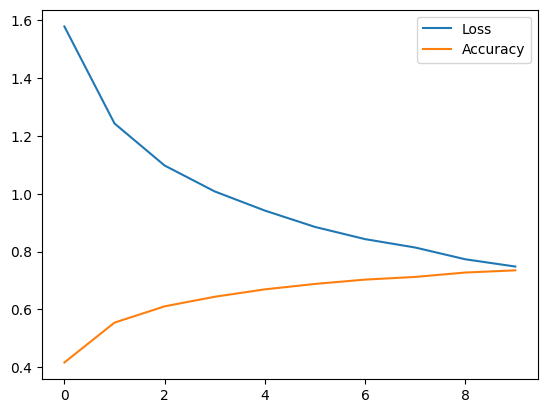

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(["Loss", "Accuracy"])

## Evaluate the model

In [19]:
evaluation = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7474 - accuracy: 0.7428


In [20]:
predicted_classes = model.predict(X_test)
predicted_classes = predicted_classes.argmax(1)
# np.set_printoptions(threshold=np.inf, precision=4)
# print(predicted_classes)

313/313 [==============================] - 0s 1ms/step


In [21]:
y_test_1 = y_test
y_test = y_test.argmax(1)

<Axes: >

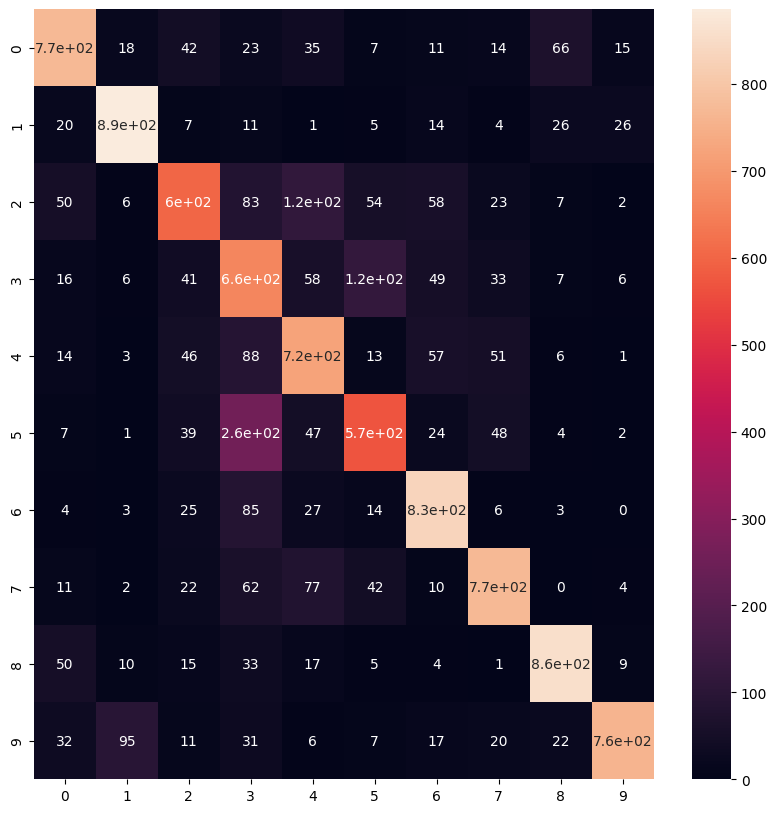

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred=predicted_classes, y_true=y_test)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)

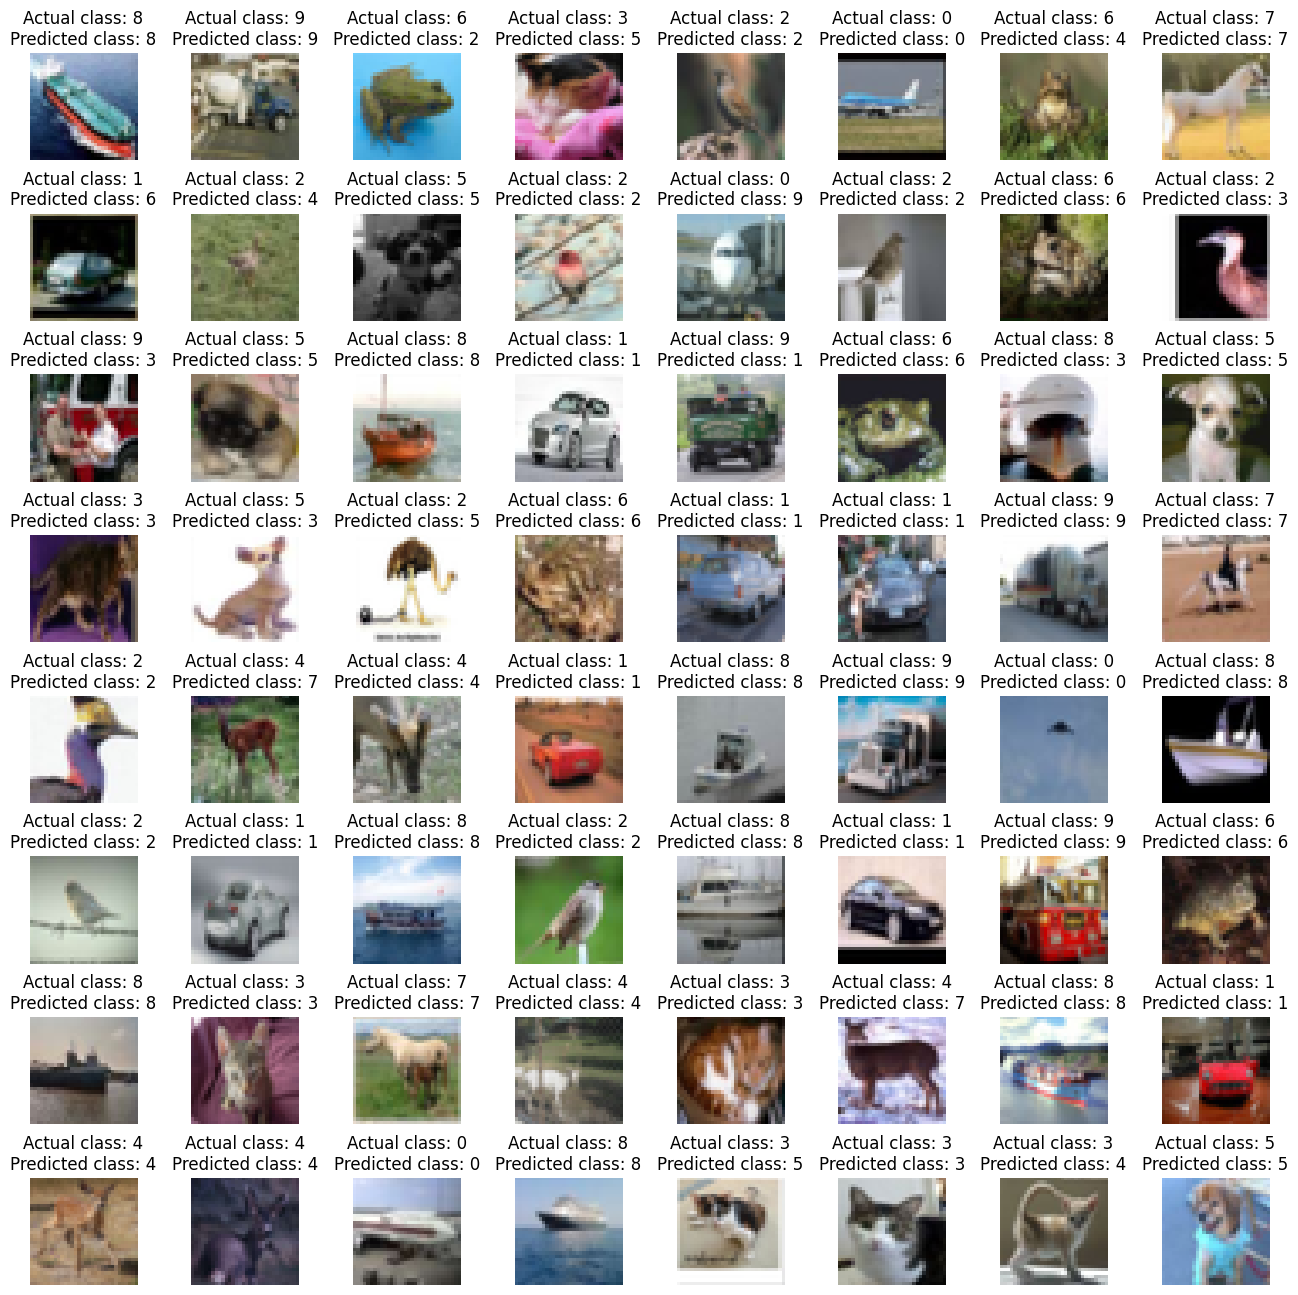

In [23]:
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
axes = axes.ravel()

for i in np.arange(0, 8 * 8):
    index = np.random.randint(len(y_test))
    axes[i].imshow(X_test[index])
    axes[i].axis('off')
    axes[i].set_title('Actual class: {}\nPredicted class: {}'.format(y_test[index], predicted_classes[index]))

plt.subplots_adjust(hspace=0.5, wspace=0.5)
    

## Save the model

In [24]:
import os
dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir, 'trained_model.h5')
model.save(model_path)

/home/min/anaconda3/envs/data_science/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Image augmentation

In [25]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.2,
    rotation_range=90,
    horizontal_flip=True
)

datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs=10)

Epoch 1/10


/tmp/ipykernel_59625/1588224346.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs=10)
2024-01-14 21:51:35.605217: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 8s 5ms/step - loss: 1.5206 - accuracy: 0.4590
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4284 - accuracy: 0.4909
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3795 - accuracy: 0.5129
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3498 - accuracy: 0.5225
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3186 - accuracy: 0.5314
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3014 - accuracy: 0.5376
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2829 - accuracy: 0.5469
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2659 - accuracy: 0.5485
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2582 - accuracy: 0.5555
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2422 - accurac

In [26]:
score = model.evaluate(X_test, y_test_1)
print(f"Loss: {score[0]:.4f}, Accuracy: {score[1]:.4f}")

313/313 [==============================] - 0s 1ms/step - loss: 1.0313 - accuracy: 0.6427
Loss: 1.0313, Accuracy: 0.6427


## Save the new model

In [27]:
model_path = os.path.join(dir, 'trained_model_augmented.h5')
model.save(model_path)